<a href="https://colab.research.google.com/github/pedrocsv/DataIntroduction/blob/main/TRABALHO_PRATICO_XPE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import plotly.express as pt
import seaborn as sns


# Leitura dos dados

In [2]:
dados = pd.read_csv('/content/frete_dias_entrega.csv', sep= ';')

In [3]:
dados

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0
...,...,...,...
495,Centro-Oeste,88.72,7.0
496,Centro-Oeste,66.35,11.0
497,Centro-Oeste,41.56,22.0
498,Centro-Oeste,73.28,9.0


# Filtrando os dados da região sudeste

In [4]:
dados_sudeste = dados[dados['Região']=='Sudeste']

In [5]:
dados_sudeste

,Região,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0
...,...,...,...
295,Sudeste,84.04,5.0
296,Sudeste,108.20,4.0
297,Sudeste,96.42,4.0
298,Sudeste,115.34,5.0


# Estatísticas dados_sudeste

In [6]:
dados_sudeste.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


# Verificando valores nulos ou ausentes

In [7]:
dados_sudeste.isna().sum()

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

# Verificando tipos de dados

In [8]:
dados_sudeste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 200 to 299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             100 non-null    object 
 1   Valor do Frete     100 non-null    float64
 2   Dias para Entrega  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Análise da correlação das variáveis

In [9]:
dados_sudeste.corr()

<ipython-input-9-a03037937725>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_sudeste.corr()


,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


# Análise gráfica da correlação entre as variáveis

<ipython-input-10-9c98a905b39f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_sudeste.corr()


<Axes: >

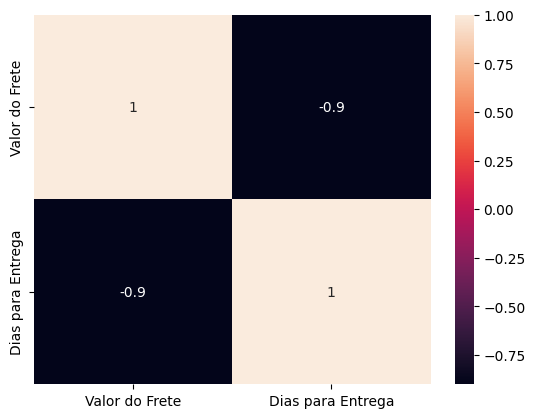

In [10]:
correlacao = dados_sudeste.corr()
sns.heatmap(correlacao, annot=True)

# Tratamento de dados

In [11]:
x= dados_sudeste.iloc[:,1].values

In [12]:
x

array([106.04, 103.51,  82.69, 108.23, 116.11, 116.26,  92.89, 116.46,
       111.23,  48.95,  41.5 ,  78.98, 102.68,  63.54,  92.67,  49.36,
        59.45,  89.51,  91.84,  70.88, 115.21,  60.42, 119.57,  66.  ,
       118.7 ,  37.7 ,  88.29,  56.9 ,  87.75, 101.31,  82.85,  65.84,
        96.94,  68.87,  33.47,  60.72, 100.98, 106.64, 109.98,  84.89,
        76.32, 100.53, 117.47,  86.73, 115.8 ,  69.96,  98.35,  84.64,
       118.49,  94.12,  89.33,  82.59, 100.33, 117.05,  85.69,  59.6 ,
       108.99,  95.84, 118.57,  50.12,  80.26,  74.58,  57.69,  60.26,
       115.93,  88.84,  92.82,  89.15,  96.69, 114.66, 114.56,  60.02,
        91.63, 119.06,  98.77,  88.12,  59.78,  95.71,  74.45,  95.53,
        87.85, 109.58,  19.17, 107.31, 107.27,  93.99,  83.67,  73.73,
        84.72,  75.63,  78.52,  77.17,  51.31,  46.94, 102.65,  84.04,
       108.2 ,  96.42, 115.34,  70.3 ])

In [13]:
x = x.reshape(-1,1)

In [14]:
y= dados_sudeste.iloc[:,2].values

# Criando modelo de regressão linear 

In [15]:
modelo = LinearRegression()

In [16]:
modelo.fit(x,y)

LinearRegression()

# Calculando a constante alfa-intercept 

In [17]:
modelo.intercept_

27.94772254633564

# Calculando o coeficiente angular da reta -coef

In [18]:
modelo.coef_

array([-0.22741735])

# Realizando a predição dos dias para entrega

In [19]:
previsao = modelo.predict(x)

# Visualizando gráfica dos dados

In [20]:
grafico = pt.scatter(x=x.ravel(), y=y)
grafico.add_scatter(x=x.ravel(), y=previsao)
grafico.show()

# Calculando o número de dias a partir do valor do frete


In [21]:
valor = 52.98

modelo.predict([[valor]])


array([15.89915149])

# Avaliação do modelo

In [22]:
# Calculando a acurácia do modelo
modelo.score(x,y)

0.8111671052762233

In [23]:
# Calculando o Mean absolut error
mean_absolute_error(y,previsao)

2.091861170350245

In [24]:
#calculando o Mean Squared Error
MSE= mean_squared_error(y, previsao)
print(MSE)

6.145679858522149


In [25]:
# Calculando o Root Mean squared error
np.sqrt(MSE)

2.479048175917957